**DOMAIN:** Sports

**CONTEXT:** Company X manages the men's top professional basketball division of the American league system. The dataset contains information on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.

**DATA DESCRIPTION:** Basketball.csv - The data set contains information on all the teams so far participated in
all the past tournaments.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Read the CSV file.**

In [ ]:
df = pd.read_csv("CompanyX_EU.csv")
df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [ ]:
df.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


**Check the datatypes of each attribute.**

In [ ]:
df.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

**Check for null values in the attributes.**

In [ ]:
df.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

**Drop the null values.**

In [ ]:
df1 = df.dropna().copy(deep=True)   # drop the rows
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


**Convert the ‘Funding’ features to a numerical value.**

In [ ]:
df1.loc[:,'Funding_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

**Code Explanation:**
Within the lambda function, we passed two if else blocks. If the last element in the value is 'K', then divide the number by 1000 else, if it is 'B', multiply by 1000 else, return as it is. We passed this lambda function to the apply method which we used on the 'Funds Raised' column and assigned the result to a new column ('funding_in_million') in the dataframe

In [ ]:
df1.sample(3)

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
623,Voltera,voltera.io,$55K,Hardware Battlefield 2015,Winner,Operating,0.055
386,Open Garden,opengarden.com,$12.8M,Disrupt NYC 2012,Finalist,Operating,12.800
192,Floored,floored.com,$6.4M,Disrupt NYC 2013,Finalist,Acquired,6.400


**Plot box plot for funds in million.**

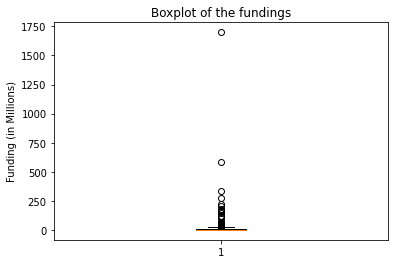

In [ ]:
%matplotlib inline

plot = plt.boxplot(df1.Funding_in_million)
plt.title('Boxplot of the fundings')
plt.ylabel("Funding (in Millions)")

plt.show()

**Get the lower fence from the box plot.**

In [ ]:
median = np.median(df1.Funding_in_million)
Q3 = np.percentile(df1.Funding_in_million, 75)
Q1 = np.percentile(df1.Funding_in_million, 25)

iqr = Q3 - Q1
Lower_fence = Q3 - 1.5*iqr
Lower_fence

-3.619624999999999

**Check number of outliers greater than upper fence.**

In [ ]:
upper_fence = plot['caps'][1].get_data()[1][1] # we can use the  values from thebox plot itself to get the upper fence
upper_fence

22.0

In [ ]:
print(f'Number of outliers = {len(df1[df1.Funding_in_million > upper_fence])}')

df1[df1.Funding_in_million > upper_fence]

Number of outliers = 60


,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


**Drop the values that are greater than upper fence**

In [ ]:
df1.drop(df1[df1.Funding_in_million > upper_fence].index, inplace = True)

**Plot the box plot after dropping the values.**

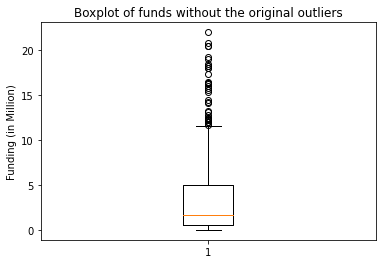

In [ ]:
plot = plt.boxplot(df1.Funding_in_million)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funding (in Million)")
plt.show()

**Check frequency of the OperatingState features classes**

In [ ]:
df1.OperatingState.value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

**Plot a distribution plot for Funds in million**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


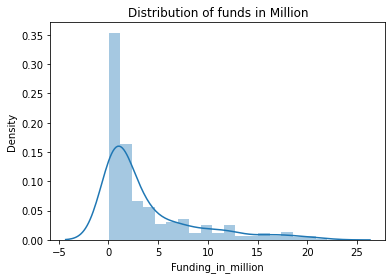

In [ ]:
dist = sns.distplot(df1.Funding_in_million)
plt.title('Distribution of funds in Million')
plt.show()

**Plot distribution plots for companies still operating and companies that closed.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


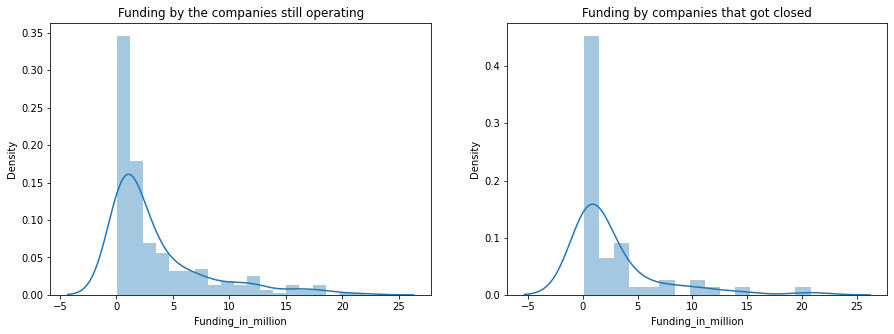

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df1.loc[df1.OperatingState == 'Operating', 'Funding_in_million'], ax = ax[0])
sns.distplot(df1.loc[df1.OperatingState == 'Closed', 'Funding_in_million'], ax = ax[1])

ax[0].set_title('Funding by the companies still operating')
ax[1].set_title('Funding by companies that got closed')

plt.show()

**Statistical analysis:**



*   Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?


Write the null hypothesis and alternative hypothesis.

Test for significance and conclusion

- Visually the distributions are quiet similar
- To prove if there is a significant difference or not we will have to perform a hypothesis test
- Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test
- For this exercise we shall do both and compare the results
- One thing to notice is that the distributions are not normal yet, since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests

For the first test, 

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

In [ ]:
from statsmodels.stats.weightstats import ztest

sample1 = df1.loc[df1.OperatingState == 'Operating', 'Funding_in_million']
sample2 = df1.loc[df1.OperatingState == 'Closed', 'Funding_in_million']

alpha = 0.05 # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value, 3)} > {alpha} (alpha) the difference is not significant and, \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and, 	 we fail to reject the Null hypothesis


**Z Test :** Hence We failed to reject the Null hypothesis

In [ ]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value, 3)} > {alpha} (alpha) the difference is not significant and, \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and, 	 we fail to reject the Null hypothesis


**T Test :** Hence We failed to reject the Null hypothesis

**Make a copy of the original data frame.**

In [ ]:
df2 = df.copy(deep = True)

In [ ]:
df2.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


**Check frequency distribution of Result variable.**

In [ ]:
df2.Result.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

**Calculate percentage of winners that are still operating and percentage of contestants that are still operating**

In [ ]:
df2.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,CUJO,jewelbots.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [ ]:
winners = df2.Result.value_counts()[1:].sum()
contestants = df2.Result.value_counts()['Contestant']

In [ ]:
print(winners)
print(contestants)

174
488


In [ ]:
contestants_operating = df2.OperatingState[df2.Result == 'Contestant'].value_counts().loc['Operating']

In [ ]:
contestants_operating

332

In [ ]:
winner_Opt_per = (winners_operating/winners)*100

In [ ]:
winner_Opt_per

76.4367816091954

In [ ]:
constant_Opt_per =  (contestants_operating/contestants)*100

In [ ]:
constant_Opt_per

68.0327868852459

Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
 
 

1.   Write the null hypothesis and alternative hypothesis.
2.   Test for significance and conclusion





- There is some difference between the proportion operational companies in the two categories, but let's see if the differnce is significant
- There are two ways we can check if the difference is significant
    - Z-test for proportions
    - Chi-square test
- We shall perform z-test in this case, however, do experiment with Chi-square test and observe if the p-value from both tests gives the same conclusion or not

**Null hyputhesis (Ho)**: The proportion of companies that are operating is the same in both categories - winners and contestants

**Alternative hypothesis (Ha)**: The proportion of companies that are operating is significantly different from each other, among the two categories

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else: 
    print(f'''\t Since the p-value, {round(p_value, 3)} > {alpha} (alpha) the difference is not significant and, \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


# Conclusion:
- The amount of funding a company is not a significant factor in deciding if the company will remain operational or close down
- Winners in the company X battle have proven to remain operational more so, than the companies that came out only as contestants

**Check distribution of the Event variable.**

In [ ]:
df1[df1.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt SF 2013         19
Disrupt SF 2014         19
Disrupt SF 2011         19
Disrupt NYC 2012        19
Disrupt SF 2015         19
Disrupt NYC 2013        19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt NYC 2011        15
Disrupt NYC 2014        15
Disrupt SF 2012         15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt London 2016     10
Disrupt NYC 2010        10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

**Select only the Event that has disrupt keyword from 2013 onwards**

In [ ]:
events = df1[df1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event # all the events of relevance
events

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards

In [ ]:
NY_events = df1.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funding_in_million']
SF_events = df1.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funding_in_million']
EU_events = df1.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funding_in_million']
print(len(NY_events), len(SF_events), len(EU_events))

71 74 40


- Each of the three above variables hold the amount of funds with respect to the Cities where the even was organised
- The sample sizes are different across the three categories and it is okay to perform ANOVA on samples of different sizes


**Null Hypothesis(Ho)**: Average funding by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funding by companies across three cities are the different

**Plot the distribution plot comparing the 3 city events.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

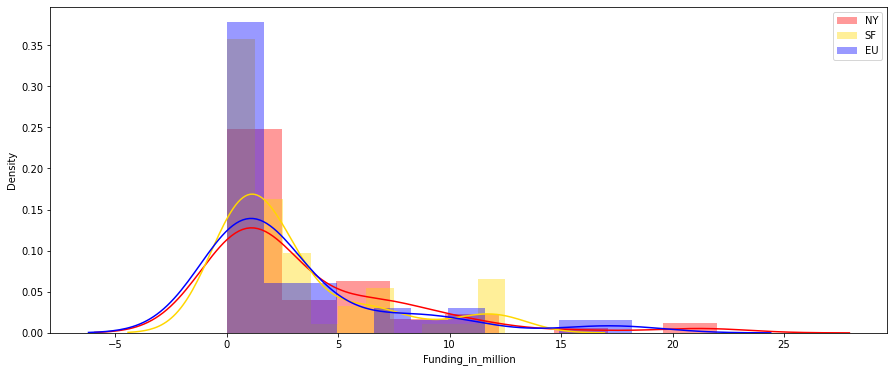

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import f_oneway

stats, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else: 
    print(f'''\t Since the p-value, {round(p_value, 3)} > {alpha} (alpha) the difference is not significant and, \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.628 > 0.05 (alpha) the difference is not significant and, 	 we fail to reject the Null hypothesis


# Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

The distribution of funding by companies in all three sectors is similar. We found no evidence to say that participating companies in certain sectors have either higher levels or lower levels of funding